<img src = "https://images2.imgbox.com/60/09/VFwl5LOq_o.jpg" width="400">

# 1. Introduction and preparing your data
---

A typical organization loses an estimated 5% of its yearly revenue to fraud. In this course, you will learn how to fight fraud by using data. For example, you'll learn how to apply supervised learning algorithms to detect fraudulent behavior similar to past ones, as well as unsupervised learning methods to discover new types of fraud activities. Moreover, in fraud analytics you often deal with highly imbalanced datasets when classifying fraud versus non-fraud, and during this course you will pick up some techniques on how to deal with that. The course provides a mix of technical and theoretical insights and shows you hands-on how to practically implement fraud detection models. In addition, you will get tips and advice from real-life experience to help you prevent making common mistakes in fraud analytics.

In this chapter, you'll learn about the typical challenges associated with fraud detection, and will learn how to resample your data in a smart way, to tackle problems with imbalanced data.

Welcome to this DataCamp course on fraud detection. To benefit from this course, you should be comfortable with manipulating dataframes, visualizing data, and have foundations in supervised and unsupervised learning.

### What is fraud?
Fraudulent behavior can be found in many different areas. Credit card fraud is perhaps the most famous example, and also in the insurance industry, fraud is a well-known issue. But it is much more broadly present than that. For example even all e-commerce businesses need to continuously assess whether client transactions on their website are legit. Detecting fraud is typically challenging because of these four characteristics of fraud described here. First of all, fraud cases are in a minority, sometimes only one-hundredth percent of a companies' transactions are fraudulent. Fraudsters will also try their best to "blend" in and conceal their activities. Moreover, fraudsters will find new methods to avoid getting caught, and change their behavior over time. Lastly, fraudsters oftentimes work together and organize their activities in a network, making it harder to detect. It can be that multiple client accounts are involved around one fraud case. Let's illustrate this with an example.

### Fraud detection is challenging
Have you ever played "Where is Waldo" or "Find the odd one out"? Like in the game, in fraud detection you'll need to train an algorithm to pick a well concealed observation out of many normal observations. 

This is much more like in real life, we'll need to find a fraud case based on numbers. The case we're looking for is well concealed and only one of these is odd. Can you find it?

`
 16 | 80 | 44 | 22 
 24 | 96 | 20 | 32 
 08 | 28 | 36 | 26 
 40 | 56 | 68 | 04   
`

Here it is, 26. It's the only number in this set that's not divisible by 4. This illustrates a typical fraud detection problem really well: based on data, you'll need to train an algorithm to find the odd one out among many normal observations.

`
 16 | 80 | 44 | 22 
 24 | 96 | 20 | 32 
 08 | 28 | 36 | 26* 
 40 | 56 | 68 | 04
`

### How companies deal with fraud
As a data scientist working on fraud analytics, you'll often be asked to improve existing fraud detection systems. You'll maybe find that the company already uses a rules based system to filter out strange cases. Or that the fraud analytics team checks the news for suspicious names, or keeps track of external hit lists from the police to reference check against the client base. All these existing methods can be useful for your machine learning model, as you can use them as inputs in your analysis. But do be mindful when using labels that come out of existing rules based systems; you should always ask yourself whether the labels are reliable as they might not catch all fraudulent cases.

### Let's have a look at some data
In this chapter we'll explore a dataset on credit card transactions. We have 29 features available, and a Class variable, containing information about whether the transaction is fraudulent or not. We have data on 5050 transactions in total. This should be enough for training our first algorithm on.

## Checking the fraud to non-fraud ratio
---
In this chapter, you will work on creditcard_sampledata.csv, a dataset containing credit card transactions data. Fraud occurrences are fortunately an extreme minority in these transactions.

However, Machine Learning algorithms usually work best when the different classes contained in the dataset are more or less equally present. If there are few cases of fraud, then there's little data to learn how to identify them. This is known as class imbalance, and it's one of the main challenges of fraud detection.

Let's explore this dataset, and observe this class imbalance problem.

### Instructions

- Import `pandas` as `pd`, read the credit card data in and assign it to `df`. This has been done for you.
- Use `.info()` to print information about `df`.
- Use `.value_counts()` to get the count of fraudulent and non-fraudulent transactions in the `'Class'` column. Assign the result to `occ`.
- Get the ratio of fraudulent transactions over the total number of transactions in the dataset.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('datasets/creditcard_sampledata.csv')

In [6]:
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   Time        8000 non-null   int64  
 2   V1          8000 non-null   float64
 3   V2          8000 non-null   float64
 4   V3          8000 non-null   float64
 5   V4          8000 non-null   float64
 6   V5          8000 non-null   float64
 7   V6          8000 non-null   float64
 8   V7          8000 non-null   float64
 9   V8          8000 non-null   float64
 10  V9          8000 non-null   float64
 11  V10         8000 non-null   float64
 12  V11         8000 non-null   float64
 13  V12         8000 non-null   float64
 14  V13         8000 non-null   float64
 15  V14         8000 non-null   float64
 16  V15         8000 non-null   float64
 17  V16         8000 non-null   float64
 18  V17         8000 non-null   float64
 19  V18         8000 non-null  

In [9]:
occ = df['Class'].value_counts()
print(occ)

0    7983
1      17
Name: Class, dtype: int64


In [10]:
print(occ / df.shape[0])

0    0.997875
1    0.002125
Name: Class, dtype: float64


## Plotting your data
---
From the previous exercise we know that the ratio of fraud to non-fraud observations is very low. You can do something about that, for example by **re-sampling** our data, which is explained in the next video.

In this exercise, you'll look at the data and **visualize the fraud to non-fraud ratio**. It is always a good starting point in your fraud analysis, to look at your data first, before you make any changes to it.

Moreover, when talking to your colleagues, a picture often makes it very clear that we're dealing with heavily imbalanced data. Let's create a plot to visualize the ratio fraud to non-fraud data points on the dataset `df`.

The function `prep_data()` is already loaded in your workspace, as well as `matplotlib.pyplot` as `plt`.

### Instructions

Define the `plot_data(X, y)` function, that will nicely plot the given feature set `X` with labels `y` in a scatter plot. This has been done for you.

Use the function `prep_data()` on your dataset `df` to create feature set `X` and labels `y`.

Run the function `plot_data()` on your newly obtained `X` and `y` to visualize your results.

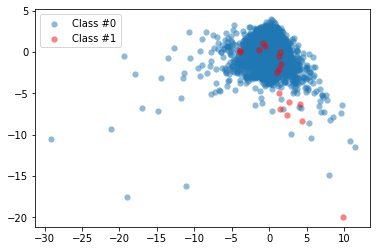

In [17]:
def prep_data(df):
    X = df.iloc[:, 3:30]
    X = np.array(X).astype(np.float64)
    y = df.iloc[:, 31]
    y=np.array(y).astype(np.float64)
    return X,y

def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

X, y = prep_data(df)

plot_data(X, y)

## Increasing successful detections using data resampling
---

Now we're going to talk about data resampling methods. They help us to better train our models to recognize fraud cases when there are only very few cases of fraud.

### Undersampling
The most straightforward way to adjust the imbalance of your data, is to undersample the majority class, aka non-fraud cases, or oversample the minority class, aka the fraud cases. With undersampling, you take random draws from your non-fraud observations, to match the amount of fraud observations as seen on the picture.

<img src = "https://images2.imgbox.com/1f/2d/Tx0ubBDg_o.png" width="400">

### Oversampling
With oversampling, you take random draws from the fraud cases, and copy those observations to increase the amount of fraud samples you have in your data. Both methods lead to having a perfect balance between fraud and non-fraud data. But there are drawbacks. With random undersampling, you are effectively throwing away a lot of data and information. With oversampling, you are simply copying data, and therefore are training your model on a lot of duplicates. Let's see how you can implement these methods in practice.

<img src = "https://images2.imgbox.com/52/92/4TcXIIZQ_o.png" width="400">

### Oversampling in Python
You can implement resampling methods using Python's imbalanced learn module. It is compatible with scikit-learn and allows you to implement these methods in just two lines of code. As you can see here, I import the package and take the Random Oversampler and assign it to method. I simply fit the method onto my original feature set X, and labels y, to obtained a resampled feature set X, and resampled y. I plot the datasets here side by side, such that you can see the effect of my resampling method. The darker blue color of the data points reflect that there are more identical data points now.

`from imblearn.over_sampling import RandomOverSampler
method = RandomOverSampler()
X_resampled, y_resampled = method.fit_sample(X, y)
compare_plots(X_resampled, y_resampled, X, y)`

### Synthetic Minority Oversampling Technique (SMOTE)
The Synthetic Minority Oversampling Technique, or SMOTE, is another way of adjusting the imbalance by oversampling your minority observations, aka your fraud cases. But with SMOTE, we're not just copying the minority class. Instead, as you see in this picture, SMOTE uses characteristics of nearest neighbors of fraud cases to create new synthetic fraud cases, and thereby avoids duplicating observations.

<img src = "https://images2.imgbox.com/fd/27/vpvoQkm3_o.png" width="700">

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

### Which resampling method to use?
You might wonder which one of these methods is the best? Well, it depends very much on the situation. If you have very large amounts of data, and also many fraud cases, you might find it computationally easier to undersample, rather than to increase data even more. But in most cases, throwing away data is not desirable. When it comes to oversampling, SMOTE is more sophisticated as it does not duplicate data. But this only works well if your fraud cases are quite similar to each other. If fraud is spread out over your data and not very distinct, using nearest neighbors to create more fraud cases introduces a bit of noise in the data, as the nearest neighbors might not necessarily be fraud cases.

- Random Under Sampling (RUS): throw away data, computationally efficient
- Random Over Sampling (ROS): straightforward and simple, but training your model on many duplicates
- Synthetic Minority Oversampling Technique (SMOTE): mode sophisticated and realistic dataset, but you are training on "fake" data

### When to use resampling methods
One thing to keep in mind when using resampling methods, is to only resample on your training set. Your goal is to better train your model by giving it balanced amounts of data. Your goal is not to predict your synthetic samples. Always make sure your test data is free of duplicates or synthetic data, such that you can test your model on real data only. The way to do this, is to first split the data into a train and test set, as you can see here. I then resample the training set only. I fit my model into the resampled training data, and lastly, I obtain my performance metrics by looking at my original, not resampled, test data. These steps should look familiar to you.

NameError: name 'prep_data' is not defined